# Multiple Linear Regression

In [2]:
import pandas as pd
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [6]:
df['smoker']=df['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes

df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
x=df.drop(columns='charges')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [10]:
y=df['charges']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:
c=model.intercept_
c

-10936.55643749616

In [17]:
m=model.coef_
m

array([  252.15440619,  -281.16765835,   316.514758  ,   351.46251009,
       24044.37169738,  -318.49464584])

In [34]:
x_train[:10]

,age,sex,bmi,children,smoker,region
744,50,1,26.410,0,0,1
363,21,0,26.400,1,0,3
10,25,1,26.220,0,0,0
970,50,0,28.160,3,0,2
634,51,1,39.700,1,0,3
554,25,0,41.325,0,0,0
314,27,0,31.400,0,1,3
419,63,0,26.980,0,1,1
525,18,0,33.880,0,0,2
1041,18,1,23.085,0,0,0


In [35]:
y_train[:10]

744      8827.20990
363      2597.77900
10       2721.32080
970     10702.64240
634      9391.34600
554     17878.90068
314     34838.87300
419     28950.46920
525     11482.63485
1041     1704.70015
Name: charges, dtype: float64

In [41]:
import numpy as np

In [47]:
y_train=np.array(y_train).reshape(-1)
y_train[:10]

array([ 8827.2099 ,  2597.779  ,  2721.3208 , 10702.6424 ,  9391.346  ,
       17878.90068, 34838.873  , 28950.4692 , 11482.63485,  1704.70015])

In [36]:
y_pred_train=model.predict(x_train)
y_pred_train[:10]

array([ 9430.65632658,  2110.65427628,  3385.15301368, 11001.61769588,
       13603.76508502,  8447.27609164, 28899.06369071, 37214.61637483,
        3688.75358331,   627.79840402])

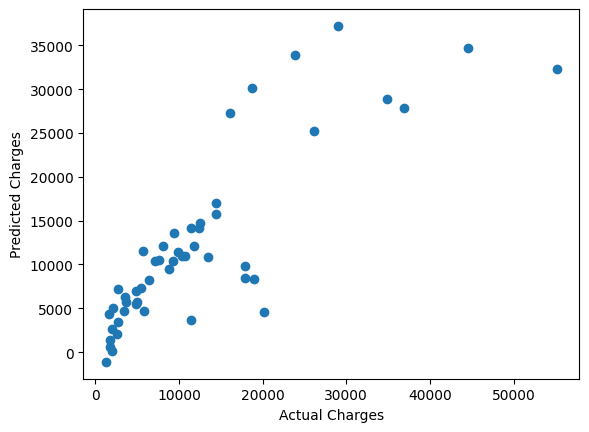

In [49]:
import matplotlib.pyplot as plt
plt.scatter(y_train[:50],y_pred_train[:50])
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()


In [50]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.7544083642384214

In [19]:
y_pred_test=model.predict(x_test)

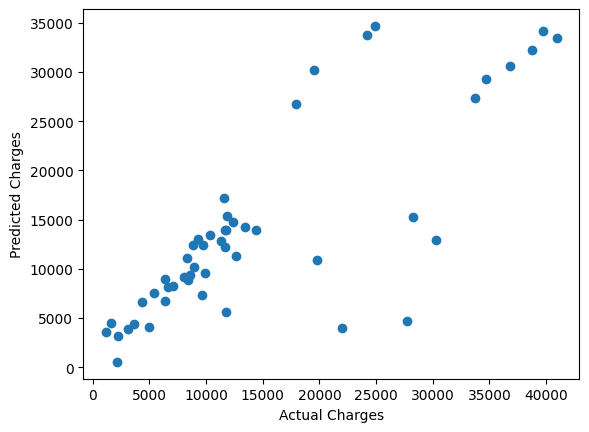

In [51]:
plt.scatter(y_test[:50],y_pred_test[:50])
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [52]:
r2_score(y_test,y_pred_test)

0.740367716897532